In [1]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import pickle
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
output_file_path = "/data/private/pdutta/Wang_collaborator/PCA_result"

In [6]:
df = pd.read_excel("/data/private/pdutta/Collab_data/Wang_collaborator/Survival_vs_death_first_day.xlsx")
df.shape

(10788, 49)

In [7]:
df.head(20)

,MouseNo,Severity,Death_0 /Survival_1,CD4,CD8a,CD25,IFN-γ,GM-CSF,IL-4,IL-5,...,Granzyme B,CCL4,CD15,CD182,CD197,IL-21,HLA-DR,CD181,β-Actin,IL-22
0,1,1,1,864.202653,653.388036,533.532407,622.283386,601.880699,523.256709,610.188377,...,648.804947,585.191381,622.984062,507.160020,521.665598,745.204173,625.576933,890.473356,730.239695,606.385944
1,1,1,1,502.256482,568.373980,988.122802,598.716245,645.511790,551.418641,560.904324,...,566.797908,902.976225,541.336585,509.972729,532.145073,513.079211,579.316823,536.086193,690.569707,538.364672
2,1,1,1,463.854773,543.952941,1117.471229,1105.009940,715.989935,541.132319,540.647678,...,587.347451,737.662682,515.291416,780.231103,606.187356,715.505628,569.176593,647.409062,584.242162,537.659564
3,1,1,1,2302.596767,1930.261640,588.094329,2349.308486,1805.575452,751.555302,2199.713286,...,972.315900,534.148282,679.868074,517.515480,490.278047,688.949714,524.763762,517.817829,763.693559,657.198799
4,1,1,1,1058.718278,3091.961426,523.016158,1387.892393,961.391537,963.863794,1837.281826,...,756.944868,1041.256293,543.882557,504.251373,510.271727,610.724690,582.022937,601.456194,720.723971,662.802631
5,1,1,1,2418.428574,845.549889,504.169945,714.724978,1473.802184,1024.840705,1823.074582,...,833.234533,983.239167,620.761161,568.014233,517.090090,626.185674,514.810013,546.470574,703.633271,557.380318
6,1,1,1,2010.637201,2838.474841,529.289258,742.795405,1366.229126,892.249453,983.676275,...,663.685095,1468.113192,637.723136,542.737009,575.964986,636.125353,502.147592,556.446473,878.825424,541.504603
7,1,1,1,1423.890754,954.820268,513.026226,2177.669702,1360.817371,813.376838,2209.773142,...,557.106513,569.331972,576.766093,499.874387,543.436410,574.512953,516.323004,505.780581,634.883564,578.725316
8,1,1,1,1768.039773,841.160408,552.858108,2433.787251,1451.730380,995.562072,1947.466785,...,685.863976,1040.576883,629.455859,524.466321,509.876372,577.984592,550.098389,514.365746,618.125529,512.396249
9,1,1,1,737.596065,945.982474,584.048760,2424.724093,1376.149390,848.858780,1784.940630,...,792.719267,905.189311,642.509867,496.837116,501.755556,601.063696,534.524566,560.327773,633.589630,583.589784


# Feature selection while we are doing classification on Severity

In [8]:
df.groupby('Severity').size()

Severity
1    2056
2    3023
3    2806
4    2903
dtype: int64

In [9]:
df.columns[3:]

Index(['CD4', 'CD8a', 'CD25', 'IFN-γ', 'GM-CSF', 'IL-4', 'IL-5', 'IL-6',
       'CD18', 'CD28', 'CD62L', 'CD279', 'IL-1β', 'IL-2', 'IL-9', 'IL-10',
       'TNF-α', 'CD69', 'IL-12', 'IL-17A', 'Perforin', 'CD32', 'CD191',
       'CD193', 'VEGF', 'CD11b', 'CD14', 'CD55', 'CD183', 'CD284', 'TGF-β',
       'CD66a', 'CD184', 'CD185', 'CD194', 'CD196', 'Granzyme B', 'CCL4',
       'CD15', 'CD182', 'CD197', 'IL-21', 'HLA-DR', 'CD181', 'β-Actin',
       'IL-22'],
      dtype='object')

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,3:], df['Severity'].to_list(), test_size=0.2, random_state=0)

In [11]:
print(X_train.shape)
print(X_test.shape)

(8630, 46)
(2158, 46)


In [12]:
{i:Y_test.count(i) for i in Y_test}

{4: 604, 2: 601, 3: 564, 1: 389}

In [13]:
clf = RandomForestClassifier(n_estimators = 1000, bootstrap=False) 
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Random forest", metrics.accuracy_score(Y_pred, Y_test))

Random forest 0.8294717330861909


In [14]:
clf.feature_importances_

array([0.0155518 , 0.01830451, 0.01114295, 0.01129175, 0.02106179,
       0.02234653, 0.01481006, 0.01474442, 0.01280901, 0.02081072,
       0.07970069, 0.02251825, 0.01423206, 0.01273039, 0.01744461,
       0.0210683 , 0.01289481, 0.02587704, 0.03601097, 0.01066517,
       0.01548221, 0.01113173, 0.038529  , 0.03142846, 0.01255266,
       0.02570719, 0.0150049 , 0.02890312, 0.01495476, 0.02165895,
       0.01184375, 0.01478098, 0.0281606 , 0.01239832, 0.01983139,
       0.01951791, 0.03688943, 0.01914696, 0.02029201, 0.01379105,
       0.02292234, 0.0381304 , 0.01127395, 0.01077222, 0.07800687,
       0.01087303])

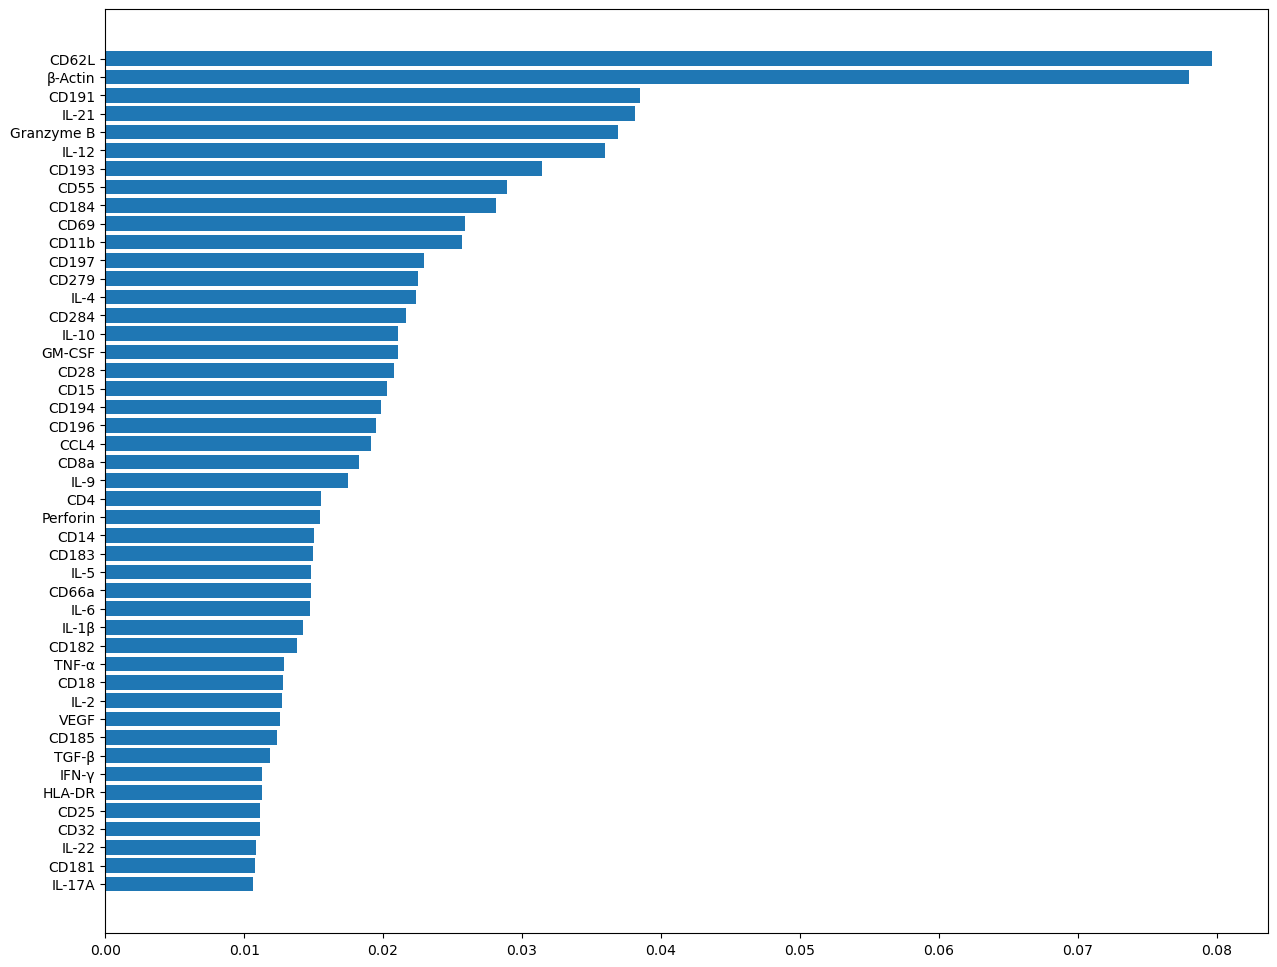

In [15]:
plt.figure(figsize=(15, 12))  
f_i = list(zip(df.columns[3:],clf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()

In [16]:
f_i

[('IL-17A', 0.010665165137706527),
 ('CD181', 0.010772218540352214),
 ('IL-22', 0.010873032065924847),
 ('CD32', 0.01113172754744689),
 ('CD25', 0.011142950101785969),
 ('HLA-DR', 0.011273951908019659),
 ('IFN-γ', 0.01129174652356916),
 ('TGF-β', 0.011843752342473531),
 ('CD185', 0.012398321639608263),
 ('VEGF', 0.012552660463317917),
 ('IL-2', 0.012730387258016184),
 ('CD18', 0.01280901498972036),
 ('TNF-α', 0.012894809293421072),
 ('CD182', 0.013791052013173377),
 ('IL-1β', 0.01423205980539931),
 ('IL-6', 0.014744415682862437),
 ('CD66a', 0.0147809826568711),
 ('IL-5', 0.01481005811122987),
 ('CD183', 0.014954757927854837),
 ('CD14', 0.015004895010043196),
 ('Perforin', 0.015482209980714126),
 ('CD4', 0.015551799541317239),
 ('IL-9', 0.017444605707333128),
 ('CD8a', 0.01830450949037507),
 ('CCL4', 0.019146963440841484),
 ('CD196', 0.019517910425911073),
 ('CD194', 0.019831387674132398),
 ('CD15', 0.020292012736861473),
 ('CD28', 0.020810723281467887),
 ('GM-CSF', 0.021061787595701355

In [15]:
Y_pred = clf.predict(X_test)
#print("Random forest", metrics.accuracy_score(Y_test, Y_pred))

conf_mat = confusion_matrix(Y_test, Y_pred)
print(conf_mat)

[[299  40  35  15]
 [ 27 531  31  12]
 [ 12  25 470  57]
 [ 11  29  74 490]]


In [16]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8294717330861909


In [17]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.86      0.77      0.81       389
           2       0.85      0.88      0.87       601
           3       0.77      0.83      0.80       564
           4       0.85      0.81      0.83       604

    accuracy                           0.83      2158
   macro avg       0.83      0.82      0.83      2158
weighted avg       0.83      0.83      0.83      2158



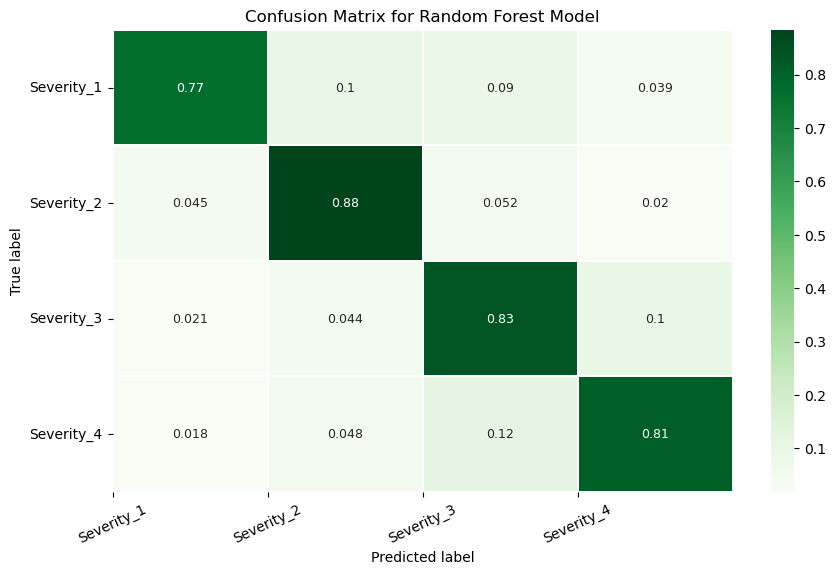

In [18]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(Y_test, Y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,6))
#sns.set(font_scale=2.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':9},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Severity_1', 'Severity_2', 'Severity_3', 'Severity_4']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## Picking up top features and do the classification

In [23]:
accuracy_list = []
for j in range(5,47):
    important_features = [ 'Severity',	'Death_0 /Survival_1']
    for i in reversed(f_i[-j:]):
        important_features.append(i[0])
    df_temp = df[important_features]
    X_train, X_test, Y_train, Y_test = train_test_split(df_temp.iloc[:,2:], df['Severity'].to_list(), test_size=0.2, random_state=0)
    print(X_train.shape, X_test.shape, len(Y_train), len(Y_test))
          
    clf = RandomForestClassifier(n_estimators = 1000) 
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(i,j, "Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
    accuracy_list.append(metrics.accuracy_score(Y_test, Y_pred))
    print(confusion_matrix(Y_test, Y_pred))

(8630, 5) (2158, 5) 8630 2158
('CD191', 0.03743664953038353) 5 Accuracy: 0.6214087117701576
[[185 107  66  31]
 [ 97 394  83  27]
 [ 25  67 334 138]
 [ 17  36 123 428]]
(8630, 6) (2158, 6) 8630 2158
('IL-12', 0.03596668215604164) 6 Accuracy: 0.6631139944392956
[[225  95  54  15]
 [ 84 418  81  18]
 [ 23  62 352 127]
 [ 18  32 118 436]]
(8630, 7) (2158, 7) 8630 2158
('CD193', 0.03160936824986872) 7 Accuracy: 0.6714550509731233
[[247  81  47  14]
 [ 79 424  80  18]
 [ 27  64 350 123]
 [ 21  32 123 428]]
(8630, 8) (2158, 8) 8630 2158
('CD55', 0.029193863284424183) 8 Accuracy: 0.6895273401297498
[[244  79  50  16]
 [ 75 429  75  22]
 [ 22  63 367 112]
 [ 14  36 106 448]]
(8630, 9) (2158, 9) 8630 2158
('CD184', 0.028480534652876383) 9 Accuracy: 0.705746061167748
[[259  66  50  14]
 [ 61 448  73  19]
 [ 25  57 365 117]
 [ 17  30 106 451]]
(8630, 10) (2158, 10) 8630 2158
('CD69', 0.026003237911737278) 10 Accuracy: 0.7233549582947173
[[269  53  51  16]
 [ 50 482  57  12]
 [ 25  48 363 128]
 [ 

In [24]:
#label_text = list(zip(range(5,20),accuracy_list))
x_range = list(range(5,47))
acc_list = [round(item, 3) for item in accuracy_list]
print(acc_list)

[0.621, 0.663, 0.671, 0.69, 0.706, 0.723, 0.747, 0.758, 0.76, 0.765, 0.769, 0.774, 0.783, 0.783, 0.802, 0.799, 0.803, 0.801, 0.808, 0.805, 0.807, 0.811, 0.815, 0.814, 0.811, 0.811, 0.815, 0.818, 0.817, 0.822, 0.821, 0.816, 0.82, 0.819, 0.819, 0.824, 0.825, 0.821, 0.823, 0.82, 0.817, 0.819]


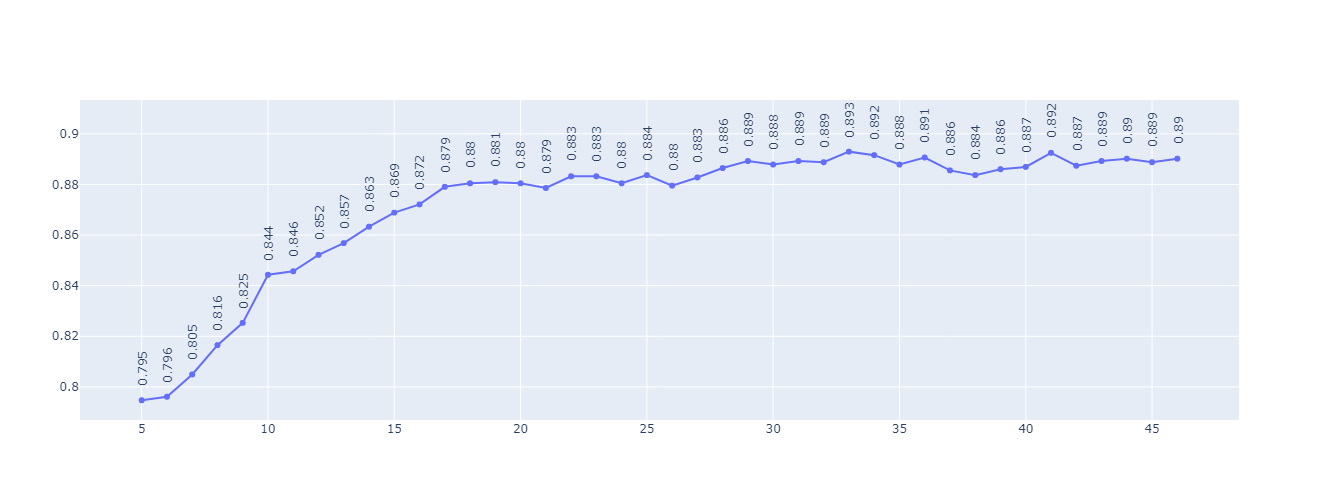

In [53]:
fig = go.Figure()
fig.update_layout(
    autosize=False,
    width=1400,
    height=500,
)
fig.add_trace(go.Scatter(x=x_range, y=accuracy_list, mode='lines+markers+text', connectgaps=True))
fig.update_traces(textposition="top center")
# fig.update_layout(
#     xaxis = dict(
#         tickmode = 'linear',
#         tickvals =x_range,
#     )
# fig.update_layout(annotations=[
#             go.layout.Annotation(x=x_range,
#             y=accuracy_list,
#             text=acc_list,
#             align='center',
#             showarrow=False,
#             yanchor='bottom',
#             textangle=90) for point in accuracy_list])
# # )


for i, m, l in zip(x_range, accuracy_list, acc_list):
    fig.add_annotation(go.layout.Annotation(
    x = i,
    y = m+ 0.005,
    text = l,
    align='center',
    showarrow=False,
    yanchor='bottom',
    textangle=-90))

fig.show()

## Feature selection while we are doing classification on survival 

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,3:], df['Death_0 /Survival_1'].to_list(), test_size=0.2, random_state=0)

In [18]:
print(X_train.shape)
print(X_test.shape)

(8630, 46)
(2158, 46)


In [19]:
{i:Y_test.count(i) for i in Y_test}

{0: 1275, 1: 883}

In [20]:
rf_survival = RandomForestClassifier(bootstrap=False, n_estimators = 1000) 
rf_survival.fit(X_train, Y_train)
Y_pred = rf_survival.predict(X_test)

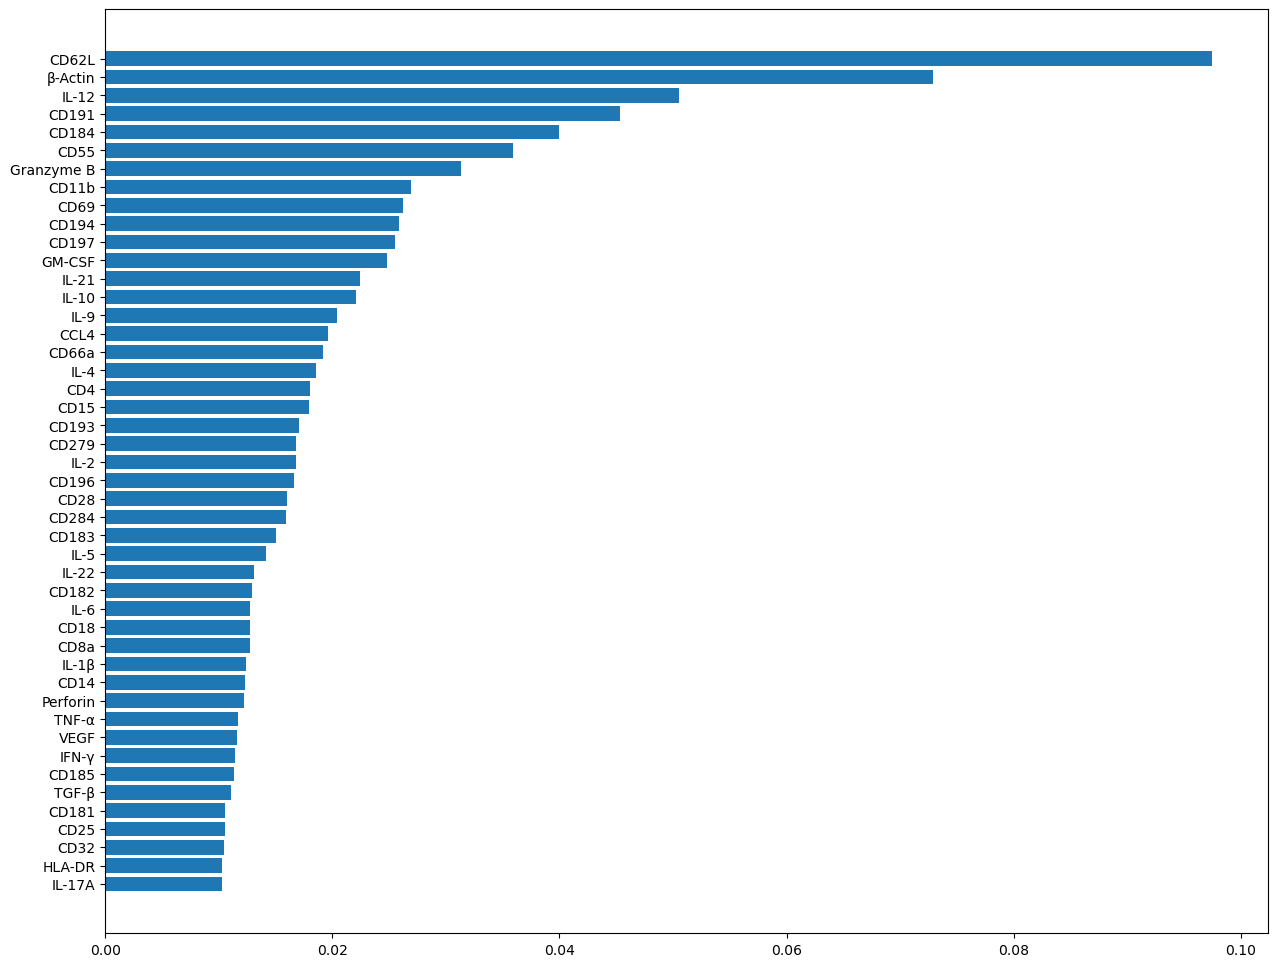

In [21]:
plt.figure(figsize=(15, 12))  
f_i = list(zip(df.columns[3:],rf_survival.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()

In [22]:
f_i

[('IL-17A', 0.010295154269712031),
 ('HLA-DR', 0.010326191164786495),
 ('CD32', 0.010426666989691552),
 ('CD25', 0.010531486607747713),
 ('CD181', 0.010556190785955257),
 ('TGF-β', 0.011083689310039696),
 ('CD185', 0.011336154768047085),
 ('IFN-γ', 0.011441778459261488),
 ('VEGF', 0.011637097123740328),
 ('TNF-α', 0.01167497697745896),
 ('Perforin', 0.012248361526646498),
 ('CD14', 0.012266845980158318),
 ('IL-1β', 0.012393314207458258),
 ('CD8a', 0.012717822136923598),
 ('CD18', 0.012732546611213294),
 ('IL-6', 0.0127778498345992),
 ('CD182', 0.012907323772017336),
 ('IL-22', 0.01312094824168755),
 ('IL-5', 0.014165991785382992),
 ('CD183', 0.015043956318326652),
 ('CD284', 0.01592834296928377),
 ('CD28', 0.015977580918299424),
 ('CD196', 0.016663412233823553),
 ('IL-2', 0.01675984283969179),
 ('CD279', 0.016820926358268123),
 ('CD193', 0.01705274593622199),
 ('CD15', 0.01791939885045676),
 ('CD4', 0.018054012810308745),
 ('IL-4', 0.018582317488293768),
 ('CD66a', 0.019187500613227056

In [31]:
Y_pred = rf_survival.predict(X_test)
print("Random forest", metrics.accuracy_score(Y_test, Y_pred))

conf_mat = confusion_matrix(Y_test, Y_pred)
print(conf_mat)

Random forest 0.8943466172381835
[[1196   79]
 [ 149  734]]


In [32]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1275
           1       0.90      0.83      0.87       883

    accuracy                           0.89      2158
   macro avg       0.90      0.88      0.89      2158
weighted avg       0.89      0.89      0.89      2158



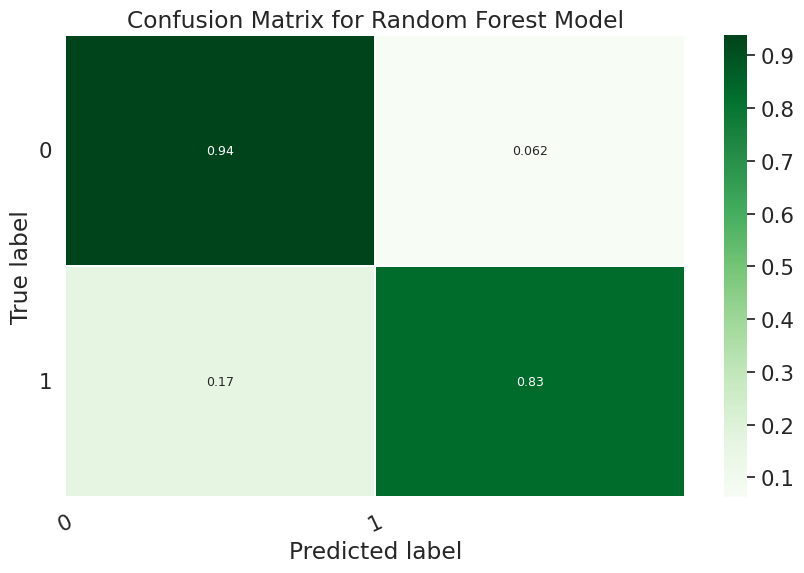

In [33]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(Y_test, Y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':9},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## Picking up top features and do the classification

In [34]:
#label_text = list(zip(range(5,20),accuracy_list))
x_range = list(range(5,47))
accuracy_list = []
for j in range(5,47):
    important_features = [ 'Severity',	'Death_0 /Survival_1']
    for i in reversed(f_i[-j:]):
        important_features.append(i[0])
    df_temp = df[important_features]
    X_train, X_test, Y_train, Y_test = train_test_split(df_temp.iloc[:,2:], df['Death_0 /Survival_1'].to_list(), test_size=0.2, random_state=0)
    print(X_train.shape, X_test.shape, len(Y_train), len(Y_test))
          
    clf = RandomForestClassifier(n_estimators = 1000) 
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(i,j, "Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
    accuracy_list.append(metrics.accuracy_score(Y_test, Y_pred))
    print(confusion_matrix(Y_test, Y_pred))

(8630, 5) (2158, 5) 8630 2158
('CD184', 0.038859405819042306) 5 Accuracy: 0.7947173308619092
[[1072  203]
 [ 240  643]]
(8630, 6) (2158, 6) 8630 2158
('CD55', 0.035563224418748485) 6 Accuracy: 0.7961075069508804
[[1077  198]
 [ 242  641]]
(8630, 7) (2158, 7) 8630 2158
('Granzyme B', 0.030830428029535138) 7 Accuracy: 0.8049119555143651
[[1081  194]
 [ 227  656]]
(8630, 8) (2158, 8) 8630 2158
('CD11b', 0.02736812169939583) 8 Accuracy: 0.8164967562557924
[[1105  170]
 [ 226  657]]
(8630, 9) (2158, 9) 8630 2158
('CD194', 0.026176834994108895) 9 Accuracy: 0.8253012048192772
[[1111  164]
 [ 213  670]]
(8630, 10) (2158, 10) 8630 2158
('CD69', 0.026069003111570392) 10 Accuracy: 0.8443002780352178
[[1139  136]
 [ 200  683]]
(8630, 11) (2158, 11) 8630 2158
('CD197', 0.0257553763073859) 11 Accuracy: 0.8456904541241891
[[1141  134]
 [ 199  684]]
(8630, 12) (2158, 12) 8630 2158
('GM-CSF', 0.024350372800694704) 12 Accuracy: 0.8521779425393883
[[1154  121]
 [ 198  685]]
(8630, 13) (2158, 13) 8630 215

In [35]:
#label_text = list(zip(range(5,20),accuracy_list))
x_range = list(range(5,47))
acc_list = [round(item, 3) for item in accuracy_list]
print(acc_list)

[0.795, 0.796, 0.805, 0.816, 0.825, 0.844, 0.846, 0.852, 0.857, 0.863, 0.869, 0.872, 0.879, 0.88, 0.881, 0.88, 0.879, 0.883, 0.883, 0.88, 0.884, 0.88, 0.883, 0.886, 0.889, 0.888, 0.889, 0.889, 0.893, 0.892, 0.888, 0.891, 0.886, 0.884, 0.886, 0.887, 0.892, 0.887, 0.889, 0.89, 0.889, 0.89]


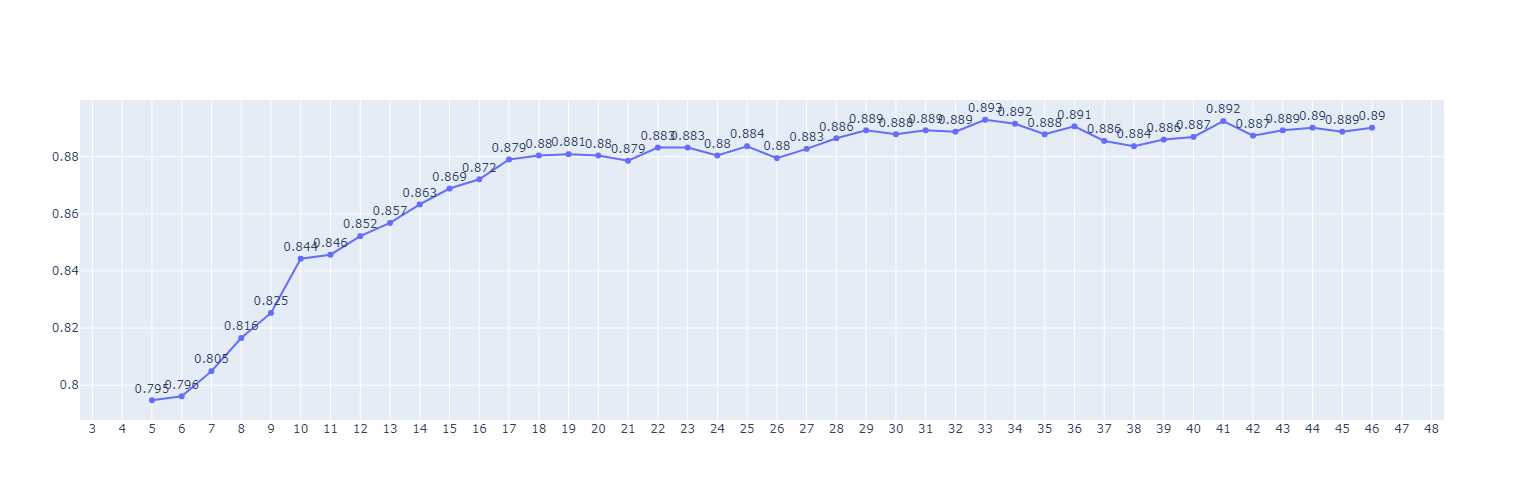

In [41]:
fig = go.Figure()
fig.update_layout(
    autosize=False,
    width=1400,
    height=500,
)
fig.add_trace(go.Scatter(x=x_range, y=accuracy_list, mode='lines+markers+text', connectgaps=True, text=acc_list))
fig.update_traces(textposition="top center")
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tickvals =x_range
    )
)
fig.show()